In [1]:
from ultralytics import YOLO
import os
import tensorboard
import torch

In [2]:
ls

 Volume in drive F is superszybkissd
 Volume Serial Number is 98A2-EE81

 Directory of f:\PRACA_MAGISTERSKA\UCZENIE_MODELI\yolov10m

16.06.2025  14:58    <DIR>          .
23.06.2025  14:58    <DIR>          ..
21.03.2025  02:56    <DIR>          .ipynb_checkpoints
21.03.2025  02:56               150 data.yaml
15.04.2025  09:38    <DIR>          predictions
06.03.2025  02:25    <DIR>          runs
06.03.2025  02:25         5˙613˙764 yolo11n.pt
16.06.2025  14:58           919˙391 yolov10m.ipynb
26.02.2025  13:18        33˙643˙667 yolov10m.pt
               4 File(s)     40˙176˙972 bytes
               5 Dir(s)  81˙525˙301˙248 bytes free


In [4]:
%load_ext tensorboard
%tensorboard --logdir runs/detect

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [4]:
torch.cuda.empty_cache()
# Load a COCO-pretrained model
model = YOLO('yolov10m.pt')

# Display model information (optional)
model.info()

# Train the model (100 epochs)
results = model.train(data='data.yaml', epochs=300, imgsz=640, device=0, patience=50, batch=-1, save_period=10, warmup_epochs=3.0, name='dataset-v2-finetune-1', freeze=10)
#results = model.train(data='data.yaml', epochs=100, imgsz=640, device=0, patience=50, batch=16, save_period=10, warmup_epochs=2.3, optimizer="AdamW", lr0=0.00012, lrf=0.00018, momentum=0.80197, warmup_momentum=0.83076)
# Export the mode
path = model.export(format="torchscript")  # return path to exported model

YOLOv10m summary: 288 layers, 16,576,768 parameters, 0 gradients, 64.5 GFLOPs
New https://pypi.org/project/ultralytics/8.3.108 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.82  Python-3.11.11 torch-2.5.1 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
engine\trainer: task=detect, mode=train, model=yolov10m.pt, data=data.yaml, epochs=300, time=None, patience=50, batch=-1, imgsz=640, save=True, save_period=10, cache=False, device=0, workers=8, project=None, name=dataset-v2-finetune-1, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=10, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_

train: Scanning F:\PRACA_MAGISTERSKA\DATASETS\MAGISTERKA-V2\labels\train.cache... 2036 images, 436 backgrounds, 0 corru


AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 3060) 12.00G total, 0.16G reserved, 0.16G allocated, 11.68G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
    16488760       63.99         1.053         104.2           nan        (1, 3, 640, 640)                    list
    16488760         128         1.944         166.3           nan        (2, 3, 640, 640)                    list
    16488760       255.9         3.248         66.63           nan        (4, 3, 640, 640)                    list
    16488760       511.9         6.034         80.19           nan        (8, 3, 640, 640)                    list
    16488760        1024        10.924         150.8           nan       (16, 3, 640, 640)                    list
AutoBatch: Using batch-size 10 for CUDA:0 7.59G/12.00G (63%) 


train: Scanning F:\PRACA_MAGISTERSKA\DATASETS\MAGISTERKA-V2\labels\train.cache... 2036 images, 436 backgrounds, 0 corru
val: Scanning F:\PRACA_MAGISTERSKA\DATASETS\MAGISTERKA-V2\labels\val.cache... 679 images, 154 backgrounds, 0 corrupt: 1


Plotting labels to runs\detect\dataset-v2-finetune-1\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 129 weight(decay=0.0), 142 weight(decay=0.00046875), 141 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 6 dataloader workers
Logging results to runs\detect\dataset-v2-finetune-1
Starting training for 300 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/300      2.92G       3.33      3.858      2.851         87        640: 100%|██████████| 204/204 [00:59<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:08

                   all        679       3388      0.808      0.816      0.875        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/300      2.85G      3.137      2.058      2.679         29        640: 100%|██████████| 204/204 [00:52<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:08

                   all        679       3388      0.831      0.837      0.898      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/300      2.76G      3.067      1.933      2.645         56        640: 100%|██████████| 204/204 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:08

                   all        679       3388      0.858      0.827        0.9      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/300      2.73G      3.061      1.855      2.633         51        640: 100%|██████████| 204/204 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:08

                   all        679       3388      0.877       0.85       0.92      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/300      2.81G      2.989      1.765      2.584         43        640: 100%|██████████| 204/204 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:08

                   all        679       3388      0.866      0.859      0.923      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/300      2.77G      2.938       1.64      2.556         43        640: 100%|██████████| 204/204 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:08

                   all        679       3388      0.882      0.872      0.934      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/300      2.74G      2.864      1.582      2.521         89        640: 100%|██████████| 204/204 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:08

                   all        679       3388      0.885      0.882      0.937      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/300      2.84G      2.862      1.578      2.515         74        640: 100%|██████████| 204/204 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:08

                   all        679       3388      0.881      0.884      0.938      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/300      2.77G      2.798       1.51      2.488         47        640: 100%|██████████| 204/204 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:08

                   all        679       3388      0.893      0.895      0.943      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/300       2.8G      2.772      1.485      2.472         43        640: 100%|██████████| 204/204 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:08

                   all        679       3388       0.91      0.866      0.945      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/300      2.79G      2.749      1.467      2.437         61        640: 100%|██████████| 204/204 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:08

                   all        679       3388      0.922       0.88      0.947       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/300       2.8G      2.738      1.419      2.414         70        640: 100%|██████████| 204/204 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:08

                   all        679       3388      0.913      0.878      0.942      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/300      2.75G      2.714       1.42      2.417         58        640: 100%|██████████| 204/204 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:08

                   all        679       3388      0.901      0.885      0.948       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/300      2.76G      2.699      1.403      2.415         31        640: 100%|██████████| 204/204 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:08

                   all        679       3388      0.914      0.892      0.953      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/300      2.77G       2.68      1.385      2.399         53        640: 100%|██████████| 204/204 [00:52<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.913      0.885       0.95      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/300      2.76G      2.654      1.352      2.399         45        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.918       0.89      0.951        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/300      2.74G      2.603      1.318      2.367         48        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.936      0.879      0.951      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/300      2.75G       2.65      1.324      2.378         37        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.921      0.901      0.959      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/300      2.76G      2.602      1.315      2.372         74        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.934      0.884      0.952      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/300      2.87G        2.6      1.302      2.352         18        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.926      0.909      0.957      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/300      2.72G      2.556      1.292      2.341         58        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.936      0.886      0.956      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/300      2.74G      2.575      1.294      2.363         46        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388       0.92      0.897      0.957      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/300      2.89G      2.566      1.274      2.332         32        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.926      0.894      0.957      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/300      2.78G      2.571      1.276      2.339         65        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.926      0.896      0.959      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/300      2.75G      2.517      1.252      2.316         59        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.941      0.885      0.958      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/300      2.74G      2.506      1.219      2.314         37        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.929      0.895      0.957      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/300      2.74G      2.482       1.23      2.304         91        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.927      0.907       0.96      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/300      2.74G      2.496      1.207      2.292         56        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.932      0.903      0.961       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/300      2.75G      2.509      1.208       2.29         57        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:08

                   all        679       3388       0.92      0.917       0.96       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/300      2.76G      2.471      1.191      2.293         55        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.915      0.914      0.958      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/300      2.83G      2.438      1.167      2.269         51        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.931      0.906      0.962      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/300      2.77G      2.439      1.166      2.277         26        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.926      0.907      0.959       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/300      2.91G      2.431      1.177      2.266         40        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.927      0.904      0.962      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/300      2.78G      2.403      1.155      2.269         56        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.937      0.904      0.963      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/300      2.76G      2.407      1.161      2.274         62        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.932      0.901      0.961      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/300      2.78G      2.391      1.166       2.25         25        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.931        0.9      0.959       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/300      2.72G       2.39      1.155      2.235         71        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.919      0.908      0.961      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/300      2.75G      2.375       1.13      2.243         71        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.928      0.902      0.963      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/300      2.76G      2.353      1.121      2.226         50        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.947      0.895      0.963      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/300      2.83G      2.382      1.139      2.234         37        640: 100%|██████████| 204/204 [00:49<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388       0.93      0.905      0.963      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/300      2.89G      2.362      1.114      2.199         35        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.944      0.904      0.964      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/300      2.78G       2.34      1.104      2.215         68        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.939      0.908      0.965      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/300      2.74G      2.332      1.091      2.217         64        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.935       0.91      0.964       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/300      2.86G      2.336      1.088      2.216         37        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.923      0.922      0.964      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/300      2.78G      2.326      1.092      2.226         54        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.932      0.909      0.964      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/300      2.78G      2.312      1.095      2.206         87        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.937      0.906      0.962      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/300      2.77G      2.308      1.073      2.194         71        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.945      0.898       0.96      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/300      2.78G      2.286      1.064      2.184         30        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.931      0.911      0.964       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/300      2.76G       2.28      1.062      2.182         62        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.927      0.911      0.961      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/300      2.75G      2.268       1.05      2.183         24        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.942      0.908      0.966      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/300      2.78G      2.263      1.055      2.162         35        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388       0.93      0.913      0.964      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/300      2.74G      2.236      1.026      2.174         36        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.939      0.911      0.964      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/300      2.86G      2.239      1.035      2.182         47        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.937      0.904      0.963      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/300       2.8G      2.253      1.037      2.162         49        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.936       0.91      0.964      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/300       2.8G      2.247      1.038      2.174         58        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.935      0.909      0.964      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/300      2.83G      2.195      1.017      2.132         60        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.949      0.896      0.964      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/300      2.88G      2.217      1.021      2.157         58        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.938      0.914      0.965      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/300      2.72G      2.231      1.036      2.177         71        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.944      0.907      0.965       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/300      2.78G      2.198     0.9994      2.154         44        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:08

                   all        679       3388      0.933      0.916      0.967      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/300       2.8G      2.203      1.019      2.141         76        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.942      0.913      0.966       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/300      2.76G      2.189      1.004      2.159         62        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.939      0.908      0.966      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/300      2.81G      2.197     0.9956      2.131         54        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.939       0.92      0.968      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/300      2.89G      2.179      1.011      2.135         35        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.943      0.915      0.968      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/300      2.74G      2.188       1.01      2.143         75        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.936      0.916      0.966      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/300      2.82G      2.192     0.9985      2.135         53        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.941       0.91      0.965      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/300      2.79G      2.146     0.9833      2.113         43        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:08

                   all        679       3388       0.95      0.905      0.965      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/300      2.79G      2.164     0.9979      2.141         49        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.932      0.917      0.963      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/300      2.89G      2.138     0.9785      2.108         50        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.934      0.916      0.965      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/300      2.77G       2.15     0.9915       2.12         35        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.945      0.914      0.965      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/300      2.75G      2.128     0.9752      2.126         39        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.934      0.924      0.967      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/300      2.76G      2.117     0.9703      2.104         46        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.938      0.911      0.965      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/300      2.78G      2.143     0.9756      2.115         35        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.941      0.921      0.966      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/300      2.72G      2.126     0.9804      2.109         48        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.945      0.912      0.965      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/300      2.76G      2.132     0.9718      2.129         33        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.936      0.915      0.963      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/300      2.88G      2.127     0.9785      2.111         39        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.948      0.908      0.966      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/300      2.73G      2.102     0.9592      2.099         64        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.943      0.913      0.964      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/300      2.79G      2.086     0.9403      2.097         36        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.949      0.908      0.964      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/300      2.79G      2.084     0.9296      2.089         55        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.937      0.916      0.964       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/300      2.77G      2.067     0.9201      2.072         45        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.937      0.919      0.967      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/300      2.89G      2.106     0.9532      2.106         54        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.941      0.922      0.968      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/300      2.76G      2.092     0.9443      2.096         58        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.944      0.917      0.968      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/300      2.87G      2.081       0.94      2.076         63        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.943      0.907      0.964      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/300      2.77G      2.048     0.9153       2.06         71        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.939      0.913      0.966      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/300      2.79G      2.044     0.9298      2.083         67        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.944      0.908      0.965      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/300      2.88G      2.064     0.9412      2.076         48        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.929       0.92      0.964      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/300      2.87G      2.056     0.9269      2.092         34        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.948      0.909      0.967      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/300      2.82G      2.039      0.916      2.072         35        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.942      0.918      0.966       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/300      2.86G      2.046     0.9254      2.078         81        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.949      0.904      0.965      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/300      2.73G      2.028     0.9314      2.059         52        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.944       0.91      0.964      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/300      2.87G      2.002     0.9032      2.062         84        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.938       0.92      0.965      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/300      2.76G      2.014     0.9111      2.057         37        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388       0.94      0.911      0.963      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/300      2.74G      2.016     0.9071      2.042         52        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.939      0.919      0.966      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/300      2.75G      2.023     0.9091      2.054         47        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.924      0.919      0.963      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/300      2.84G      1.986     0.8881      2.039         53        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388       0.94      0.916      0.965      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/300      2.82G      2.006     0.9078      2.065         77        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.945      0.914      0.965      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/300      2.73G       1.99     0.8922      2.054         34        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.945      0.917      0.967      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/300      2.82G      1.993     0.8921      2.042         70        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.938      0.913      0.964      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/300      2.85G      1.963     0.8826      2.021         28        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.933      0.921      0.964      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/300      2.82G      1.986     0.8876      2.036         41        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.936      0.922      0.967      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/300       2.8G      1.979     0.8914      2.048         83        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388       0.94      0.912      0.964      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/300      2.78G       1.96     0.8732       2.04         33        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.954       0.91      0.966      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/300      2.72G      1.971     0.8861      2.029         70        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.942      0.917      0.964      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/300      2.79G       1.95     0.8728       2.05         42        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388       0.95      0.908      0.964      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/300      2.88G      1.959     0.8678      2.023         44        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.945       0.91      0.963      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/300      2.84G      1.948     0.8773      2.046         26        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.943      0.918      0.964      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/300      2.73G      1.927      0.866       2.02         54        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.943      0.918      0.965      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/300      2.82G       1.94     0.8754      2.012         57        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.948      0.908      0.963      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/300      2.79G      1.939      0.874      2.027         37        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.945      0.916      0.965      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/300      2.85G       1.94     0.8699      2.026         37        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.955      0.909      0.967       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/300      2.81G      1.919     0.8555      2.018         31        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.949      0.914      0.967      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/300       2.8G      1.941     0.8756      2.027         37        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.938      0.919      0.964      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/300      2.75G      1.922     0.8517      2.016         74        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388       0.94      0.912      0.964      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/300      2.83G      1.921     0.8645      2.029         68        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.948       0.91      0.964      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/300      2.74G      1.912     0.8475      2.005         29        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.937      0.923      0.966      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/300      2.79G      1.937     0.8666      2.014         84        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.954      0.904      0.965      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/300       2.8G      1.892     0.8384      2.013         40        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.944      0.914      0.966      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/300      2.87G      1.914      0.853      2.005         39        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.944      0.917      0.964      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/300      2.86G      1.905     0.8479      2.011         68        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.945      0.913      0.965      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/300      2.84G      1.911     0.8547       2.01         69        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388       0.95      0.908      0.966      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/300      2.87G      1.894     0.8385          2         37        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.939      0.915      0.963      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/300      2.84G      1.885     0.8508      2.004         93        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.942      0.913      0.966      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/300      2.76G      1.873     0.8391      1.998         59        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.948      0.903      0.964       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/300      2.79G      1.868     0.8284      1.999         50        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.946      0.914      0.965      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/300      2.74G      1.887      0.836      1.984         77        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.936      0.917      0.965      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/300      2.81G      1.867      0.821      1.984         45        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.949       0.91      0.966      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/300      2.78G      1.863     0.8148      2.001         76        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.943      0.915      0.965      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/300      2.77G      1.861     0.8265      1.999         50        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.948      0.912      0.966      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/300      2.76G      1.853     0.8249      1.986         39        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.956      0.911      0.967      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/300      2.73G      1.851      0.825      1.996         41        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.953      0.912      0.966       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/300      2.76G      1.845     0.8271      1.977         42        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.949      0.918      0.965      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/300      2.83G      1.868     0.8268      1.972         28        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388       0.94      0.919      0.965      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/300      2.74G       1.84     0.8094      1.977         32        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388       0.94      0.913      0.964      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/300      2.75G      1.844     0.8195      1.977         69        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.949      0.908      0.965      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/300      2.76G      1.837      0.815      1.971         34        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.955      0.906      0.967      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/300      2.77G      1.834     0.8135      1.967         34        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.953       0.91      0.965      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/300      2.75G      1.822     0.8201      1.983         49        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.952      0.911      0.966      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/300      2.86G       1.83     0.8188      1.969         54        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.963      0.899      0.965      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/300       2.8G      1.826     0.8095      1.979         35        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388       0.95      0.913      0.966      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/300      2.73G      1.811     0.7888      1.967         77        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.952      0.913      0.967      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/300      2.87G      1.823     0.8148      1.984         23        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.949      0.911      0.966       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/300      2.78G       1.81     0.7965      1.972         52        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.933      0.925      0.965      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/300      2.73G      1.797     0.7998       1.97         45        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.942      0.919      0.966      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/300       2.9G      1.789     0.7878      1.963         57        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.953      0.905      0.966      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/300      2.86G      1.806     0.7967      1.967         33        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.951      0.911      0.965      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/300      2.85G      1.808     0.8095      1.968         36        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.951      0.905      0.963      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/300       2.9G      1.805     0.8053       1.95         51        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.941      0.912      0.964      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/300       2.8G      1.777     0.7831      1.946         67        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.945      0.916      0.966      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/300      2.73G      1.787      0.792      1.957         55        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.952      0.904      0.966      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/300      2.79G      1.767     0.7837      1.937         39        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.953      0.905      0.966      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/300      2.81G      1.785     0.7948      1.956         62        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.955      0.909      0.966      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/300      2.87G      1.782     0.7985      1.955         31        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.947      0.917      0.966       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/300      2.77G      1.767     0.7866      1.958         61        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.938      0.917      0.966       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/300      2.78G      1.766     0.7869      1.952         66        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388       0.95      0.906      0.965      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/300      2.76G      1.785      0.806       1.96         54        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388       0.95      0.909      0.965      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/300      2.77G      1.776      0.795      1.958         46        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.948       0.91      0.965      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/300      2.74G      1.764      0.781      1.939         29        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.953      0.906      0.965      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/300      2.75G       1.76     0.7854      1.947         56        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.952      0.907      0.965       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/300      2.88G      1.775      0.786      1.954         43        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.954      0.909      0.967      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/300      2.83G      1.755     0.7801      1.942         25        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.959        0.9      0.966      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/300      2.78G      1.774     0.7818       1.96         38        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.956      0.907      0.967      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/300      2.82G      1.762     0.7929      1.944         69        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.954      0.908      0.965      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/300      2.79G      1.755     0.7734      1.948         60        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.942      0.914      0.965      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/300      2.75G      1.762     0.7816      1.945         79        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.951      0.914      0.966      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/300       2.9G      1.739     0.7758      1.955         62        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.952       0.91      0.967      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/300      2.78G      1.737     0.7739      1.935         42        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.953      0.907      0.968       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/300      2.72G       1.73     0.7654      1.929         89        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.952      0.915      0.966      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/300       2.8G       1.72     0.7534      1.939         29        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388       0.95      0.909      0.965      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/300      2.74G      1.713     0.7571       1.94         27        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.952      0.914      0.966      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/300      2.73G      1.708     0.7514      1.931         61        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.951      0.915      0.966       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/300      2.82G       1.72     0.7582      1.922         53        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.957      0.913      0.966      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/300      2.75G      1.699      0.763      1.935         29        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.947      0.918      0.964       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/300      2.77G      1.706      0.758      1.929         30        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.954      0.913      0.964       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/300      2.87G      1.705      0.741      1.911         91        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.944      0.919      0.965      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/300      2.86G      1.731     0.7565      1.933         63        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.954       0.91      0.965      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/300      2.82G       1.69      0.742      1.924         59        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.954      0.912      0.966       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/300      2.85G      1.708     0.7601      1.925         50        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.963      0.904      0.966      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/300      2.81G      1.687     0.7473      1.906         61        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.951      0.915      0.967      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/300      2.77G      1.674     0.7391      1.917         36        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.959      0.907      0.967       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/300      2.72G      1.688     0.7451      1.908         73        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.954      0.909      0.965      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/300      2.77G      1.688     0.7359      1.913         37        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.964      0.908      0.967      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/300      2.87G      1.683     0.7396      1.916         62        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.961      0.909      0.967      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/300      2.89G      1.691     0.7484      1.919         74        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.948      0.918      0.967      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/300      2.79G      1.687      0.738      1.906         37        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.946      0.915      0.966      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/300      2.72G      1.686     0.7365      1.916         47        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.954      0.909      0.964      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/300      2.89G      1.689     0.7495      1.919         91        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.952      0.917      0.967      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/300      2.76G      1.694     0.7542      1.937         47        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.955      0.911      0.966      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/300      2.86G      1.662     0.7357      1.907         22        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.941      0.922      0.966      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/300      2.86G      1.666     0.7336      1.918         55        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388       0.96      0.906      0.967       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/300      2.88G      1.666     0.7369      1.912         75        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.945      0.919      0.966      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/300      2.81G      1.661     0.7303      1.903         31        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.941      0.917      0.964      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/300      2.86G      1.674     0.7475      1.912         53        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388       0.95       0.91      0.964      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/300      2.77G       1.66     0.7469      1.924         45        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.952      0.914      0.966       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/300      2.73G      1.657     0.7299      1.891         55        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.949      0.913      0.965       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/300      2.74G       1.65     0.7292      1.894         47        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.948      0.914      0.965       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/300      2.76G      1.633      0.719      1.901         39        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.952      0.913      0.966      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/300      2.79G      1.649     0.7232      1.888         50        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.948      0.916      0.967      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/300      2.92G       1.65     0.7293      1.899         48        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.951      0.917      0.967       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/300       2.8G      1.629     0.7159      1.896         68        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.949      0.917      0.967      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/300      2.78G      1.646     0.7268      1.898         61        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.949      0.915      0.967      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/300      2.77G      1.642       0.73      1.905         89        640: 100%|██████████| 204/204 [00:53<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:08

                   all        679       3388      0.951      0.915      0.966      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/300      2.79G       1.64     0.7223      1.892         76        640: 100%|██████████| 204/204 [00:52<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:08

                   all        679       3388      0.954      0.912      0.967      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/300       2.8G      1.635     0.7178      1.885         52        640: 100%|██████████| 204/204 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:08

                   all        679       3388      0.945      0.914      0.964       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/300      2.72G       1.63     0.7195      1.887         40        640: 100%|██████████| 204/204 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:08

                   all        679       3388      0.944      0.919      0.965       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/300      2.85G      1.626     0.7179      1.902         50        640: 100%|██████████| 204/204 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388       0.95      0.916      0.966      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/300      2.71G      1.619     0.7181      1.905         68        640: 100%|██████████| 204/204 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:08

                   all        679       3388      0.953      0.911      0.967      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/300      2.78G      1.621     0.7137      1.898         61        640: 100%|██████████| 204/204 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:08

                   all        679       3388      0.951      0.912      0.966      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    207/300       2.8G      1.602     0.7074      1.886         36        640: 100%|██████████| 204/204 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:08

                   all        679       3388      0.956      0.908      0.966      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    208/300      2.74G      1.619     0.7116      1.898         57        640: 100%|██████████| 204/204 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:08

                   all        679       3388      0.953      0.916      0.966      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    209/300      2.79G      1.616     0.7072      1.888         61        640: 100%|██████████| 204/204 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.951      0.918      0.966      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    210/300      2.75G      1.611     0.7134      1.887         43        640: 100%|██████████| 204/204 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.949      0.917      0.967      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    211/300      2.73G      1.601      0.696      1.894         52        640: 100%|██████████| 204/204 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:08

                   all        679       3388      0.946      0.916      0.966      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    212/300      2.74G      1.625     0.7181      1.881         44        640: 100%|██████████| 204/204 [00:52<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:08

                   all        679       3388      0.952      0.914      0.966      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    213/300      2.78G      1.588     0.6957      1.877         51        640: 100%|██████████| 204/204 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:08

                   all        679       3388      0.947      0.915      0.966      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    214/300      2.74G      1.573      0.697      1.882         75        640: 100%|██████████| 204/204 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.958       0.91      0.967      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    215/300      2.75G      1.592     0.7057      1.881         25        640: 100%|██████████| 204/204 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:08

                   all        679       3388      0.949      0.916      0.967      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    216/300      2.81G      1.595     0.7021       1.88         56        640: 100%|██████████| 204/204 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:08

                   all        679       3388      0.952      0.914      0.967      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    217/300      2.78G      1.586     0.6941      1.876         42        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.955      0.916      0.967      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    218/300      2.74G      1.579     0.6961      1.882         50        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.943       0.92      0.966      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    219/300      2.75G      1.578     0.6881      1.874         27        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.954      0.915      0.966      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    220/300      2.75G      1.593     0.7013      1.875         38        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.957      0.909      0.965      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    221/300      2.79G      1.585     0.6978      1.878         37        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.946      0.914      0.963      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    222/300      2.81G      1.581     0.6949      1.862         61        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.944       0.92      0.965      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    223/300      2.77G      1.586     0.6945      1.869         47        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.943       0.92      0.964      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    224/300      2.78G      1.588     0.7063      1.883         26        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.949      0.919      0.966      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    225/300      2.79G      1.588     0.6973      1.875         27        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.946      0.918      0.966      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    226/300      2.87G      1.571     0.6847      1.878         34        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.947      0.916      0.966      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    227/300      2.85G      1.578     0.6952      1.881         34        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.943       0.92      0.965      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    228/300      2.87G      1.574     0.6977      1.883         71        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.948      0.915      0.965      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    229/300       2.9G      1.568     0.6943      1.878         62        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388       0.95      0.913      0.965      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    230/300      2.73G      1.558     0.6816      1.862         39        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.948      0.916      0.965      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    231/300       2.8G      1.542     0.6836      1.866         44        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.952      0.912      0.965      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    232/300      2.75G      1.546     0.6757       1.86         53        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388       0.95      0.914      0.966      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    233/300      2.75G      1.556     0.6835       1.86         55        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388       0.95      0.916      0.967      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    234/300      2.79G      1.541     0.6772      1.873         37        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.951      0.911      0.965      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    235/300      2.86G      1.533     0.6733      1.866         65        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.954      0.912      0.966      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    236/300      2.79G      1.554     0.6865      1.873         51        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.954      0.916      0.966      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    237/300      2.84G      1.541     0.6765      1.879         41        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.953      0.914      0.966      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    238/300      2.76G      1.534     0.6784      1.859         50        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.954      0.911      0.965      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    239/300      2.89G       1.55     0.6785      1.862         31        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.957      0.909      0.966      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    240/300      2.79G       1.54     0.6758      1.858         65        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.951      0.915      0.966      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    241/300      2.79G      1.539     0.6721      1.855         41        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.953      0.916      0.965      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    242/300      2.72G      1.534     0.6739      1.854         46        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.957      0.909      0.965      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    243/300      2.81G       1.55     0.6782      1.854         33        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.954      0.914      0.965      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    244/300      2.74G      1.536     0.6704      1.863         58        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.954      0.909      0.964      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    245/300      2.75G      1.522     0.6685      1.849         39        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.948      0.916      0.964      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    246/300      2.77G       1.53     0.6668      1.856         32        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.952      0.911      0.964      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    247/300      2.73G      1.518     0.6692      1.855         65        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.956      0.908      0.963       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    248/300      2.81G      1.525     0.6678      1.857         33        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.962      0.902      0.964       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    249/300      2.73G      1.522     0.6674      1.852         79        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.949      0.918      0.965      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    250/300      2.79G      1.521     0.6687      1.861         48        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.942      0.923      0.965      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    251/300      2.75G       1.51     0.6688      1.861         74        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.948      0.918      0.965      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    252/300      2.78G      1.538     0.6765      1.862         86        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.952      0.915      0.964      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    253/300      2.78G      1.506     0.6605      1.837         67        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.954      0.916      0.964       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    254/300      2.79G      1.519     0.6673      1.856         66        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.952      0.915      0.964       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    255/300      2.75G      1.506     0.6581      1.851         52        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.954      0.913      0.964       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    256/300      2.76G      1.512      0.657      1.847         50        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388       0.95      0.913      0.964       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    257/300      2.73G      1.512     0.6607      1.854         67        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388       0.95      0.914      0.964      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    258/300      2.78G      1.519     0.6575      1.851         90        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.952       0.91      0.964      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    259/300      2.75G      1.489      0.648      1.841         57        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.951      0.915      0.965      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    260/300      2.77G      1.491     0.6481      1.856         68        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.953       0.91      0.964      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    261/300      2.87G      1.498     0.6603      1.839         61        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.946      0.916      0.965      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    262/300       2.8G      1.493     0.6536      1.838         50        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.954       0.91      0.965       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    263/300      2.74G      1.493     0.6529       1.85         58        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.955      0.906      0.965       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    264/300      2.74G      1.505     0.6633      1.844         78        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.954      0.911      0.965       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    265/300      2.86G      1.514     0.6522      1.853         29        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.955      0.906      0.964       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    266/300       2.8G      1.495     0.6575      1.847         49        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.956      0.908      0.965      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    267/300      2.75G      1.467     0.6484      1.852         24        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388       0.96      0.903      0.965      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    268/300      2.74G      1.486     0.6512      1.848         72        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.963      0.904      0.965      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    269/300      2.82G      1.494     0.6653      1.845         42        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388       0.96      0.905      0.965      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    270/300      2.83G      1.486     0.6528      1.845         74        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.947      0.916      0.965      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    271/300      2.76G      1.484     0.6483       1.83         45        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.951      0.912      0.965      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    272/300      2.77G       1.48     0.6544       1.85         46        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.949      0.915      0.964      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    273/300      2.78G      1.486     0.6514      1.838         36        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.952       0.91      0.964      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    274/300      2.78G      1.489     0.6501       1.84         63        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.947      0.914      0.965      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    275/300       2.9G      1.471     0.6444      1.833         54        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.951      0.911      0.965      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    276/300      2.77G      1.482      0.647       1.83         68        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.954      0.912      0.965      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    277/300      2.76G      1.469     0.6444      1.827         45        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.955      0.911      0.965      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    278/300      2.84G      1.466     0.6456      1.832         46        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388       0.96      0.907      0.966      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    279/300      2.78G      1.465      0.651      1.839         46        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.958       0.91      0.966      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    280/300      2.81G      1.473     0.6431      1.832         49        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.959       0.91      0.965      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    281/300      2.76G      1.475     0.6487      1.834         63        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.955      0.911      0.965      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    282/300      2.88G      1.469     0.6433      1.835         37        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.953      0.914      0.966      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    283/300      2.75G      1.485     0.6555      1.843         45        640: 100%|██████████| 204/204 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07

                   all        679       3388      0.953      0.914      0.966      0.641
EarlyStopping: Training stopped early as no improvement observed in last 50 epochs. Best results observed at epoch 233, best model saved as best.pt.
To update EarlyStopping(patience=50) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



283 epochs completed in 4.682 hours.
Optimizer stripped from runs\detect\dataset-v2-finetune-1\weights\last.pt, 33.5MB
Optimizer stripped from runs\detect\dataset-v2-finetune-1\weights\best.pt, 33.5MB

Validating runs\detect\dataset-v2-finetune-1\weights\best.pt...
Ultralytics 8.3.82  Python-3.11.11 torch-2.5.1 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLOv10m summary (fused): 159 layers, 16,455,016 parameters, 0 gradients, 63.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07


                   all        679       3388      0.949      0.916      0.967      0.644
            no_glasses        407        605      0.951      0.904      0.966      0.583
             no_gloves        472       1207      0.935      0.892      0.945      0.617
             no_helmet        449        760      0.953      0.938      0.973      0.635
               no_vest        481        816      0.959      0.931      0.981      0.741
Speed: 0.2ms preprocess, 5.9ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs\detect\dataset-v2-finetune-1
Ultralytics 8.3.82  Python-3.11.11 torch-2.5.1 CPU (Intel Core(TM) i5-8400 2.80GHz)
YOLOv10m summary (fused): 159 layers, 16,455,016 parameters, 0 gradients, 63.4 GFLOPs

PyTorch: starting from 'runs\detect\dataset-v2-finetune-1\weights\best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 300, 6) (31.9 MB)

TorchScript: starting export with torch 2.5.1...
TorchScript: export success  4.4s, saved as '

Ewaluacja modelu

In [3]:
torch.cuda.empty_cache()
# Load a model
model = YOLO('runs/detect/dataset-v2-finetune-1/weights/epoch110.pt')

# Validate a model
metrics = model.val(iou=0.6)   # no arguments needed, dataset and settings remembered
metrics.box.map         # map50-95
metrics.box.map50       # map50
metrics.box.map75       # map75
metrics.box.maps        # a list contains map50-95 of each category

Ultralytics 8.3.82  Python-3.11.11 torch-2.5.1 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLOv10m summary (fused): 159 layers, 16,455,016 parameters, 0 gradients, 63.4 GFLOPs


val: Scanning F:\PRACA_MAGISTERSKA\DATASETS\MAGISTERKA-V2\labels\val.cache... 679 images, 154 backgrounds, 0 corrupt: 1
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:11


                   all        679       3388      0.939      0.917      0.964      0.638
            no_glasses        407        605      0.937      0.894      0.962      0.581
             no_gloves        472       1207      0.921      0.891      0.935      0.604
             no_helmet        449        760      0.939      0.946      0.978      0.635
               no_vest        481        816      0.959      0.938      0.982      0.731
Speed: 0.2ms preprocess, 10.9ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to runs\detect\val9


array([    0.58052,     0.60434,     0.63542,     0.73117])

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
np.mean(metrics.box.f1)

np.float64(0.9277739118913408)

In [8]:
metrics.box.f1

array([    0.91491,      0.9055,     0.94243,     0.94825])

In [9]:
metrics.speed['inference']

10.299779823257914

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings

def plot_confusion_matrix(matrix, normalize=True, names=()):
    """
    Plot the confusion matrix using seaborn.
    należy dwukrotnie wywołać funkcję aby zwiększył się rozmiar opisów

    Args:
        matrix (np.ndarray): Macierz pomyłek (np. metrics.confusion_matrix.matrix)
        normalize (bool, optional): Czy normalizować macierz. Default: True
        names (tuple, optional): Nazwy klas, używane jako etykiety na wykresie.
    """
    array = matrix / ((matrix.sum(0).reshape(1, -1) + 1e-9) if normalize else 1)  # normalizacja kolumn
    array[array < 0.005] = np.nan  # nie pokazuj wartości poniżej 0.005 (będzie pusty)

    fig, ax = plt.subplots(1, 1, figsize=(12, 9), tight_layout=True)
    nc = metrics.confusion_matrix.nc
    nn = len(names)  # liczba nazw
    sn.set(font_scale=1.5 if nc < 50 else 0.8)  # rozmiar czcionki
    labels = (0 < nn < 99) and (nn == nc)  # czy zastosować nazwy jako etykiety
    ticklabels = (list(names.values()) + ["background"]) if labels else "auto"
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")  # ignoruj ostrzeżenia o pustej macierzy
        sn.heatmap(
            array,
            ax=ax,
            annot=nc < 30,
            annot_kws={"size": 18},
            cmap="Blues",
            fmt=".2f" if normalize else ".0f",
            square=True,
            vmin=0.0,
            xticklabels=ticklabels,
            yticklabels=ticklabels,
        ).set_facecolor((1, 1, 1))
    title = "Confusion Matrix" + (" Normalized" if normalize else "")
    ax.set_xlabel("True")
    ax.set_ylabel("Predicted")
    ax.set_title(title)
    plt.show()

In [6]:
def plot_mc_curve(px, py, names=(), xlabel="Confidence", ylabel="Metric"):
    """Plots a metric-confidence curve."""
    fig, ax = plt.subplots(1, 1, figsize=(9, 6), tight_layout=True)

    if 0 < len(names) < 21:  # display per-class legend if < 21 classes
        for i, y in enumerate(py):
            ax.plot(px, y, linewidth=1, label=f"{names[i]}")  # plot(confidence, metric)
    else:
        ax.plot(px, py.T, linewidth=1, color="grey")  # plot(confidence, metric)

    y = smooth(py.mean(0), 0.05)
    ax.plot(px, y, linewidth=3, color="blue", label=f"all classes, best Confidence {y.max():.2f} at {px[y.argmax()]:.3f}")
    ax.set_xlabel(xlabel, fontsize=17)
    ax.set_ylabel(ylabel, fontsize=17)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.grid(True)
    ax.legend(fontsize=17)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    ax.set_title(f"{ylabel}-Confidence Curve", fontsize=18)
    plt.show()

In [7]:
def plot_pr_curve(px, py, ap, names=()):
    """Plots a precision-recall curve."""
    fig, ax = plt.subplots(1, 1, figsize=(9, 6), tight_layout=True)
    py = np.stack(py, axis=1)  # shape (len(px), num_classes)
    ap = np.array(ap).flatten()  # zapewnia 1D

    if 0 < len(names) < 21:
        for i, y in enumerate(py.T):
            ax.plot(px, y, linewidth=1, label=f"{names[i]} {ap[i]:.3f}")
    else:
        ax.plot(px, py, linewidth=1, color="grey")

    ax.plot(px, py.mean(1), linewidth=3, color="blue", label=f"all classes {ap.mean():.3f} mAP@0.5")
    ax.set_xlabel("Recall", fontsize=17)
    ax.set_ylabel("Precision", fontsize=17)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.legend(loc='lower left', fontsize=17)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    ax.grid(True)
    ax.set_title("Precision-Recall Curve", fontsize=18)
    plt.show()

In [8]:
def smooth(y, f=0.05):
    """Box filter of fraction f."""
    nf = round(len(y) * f * 2) // 2 + 1  # number of filter elements (must be odd)
    p = np.ones(nf // 2)  # ones padding
    yp = np.concatenate((p * y[0], y, p * y[-1]), 0)  # y padded
    return np.convolve(yp, np.ones(nf) / nf, mode="valid")  # y-smoothed

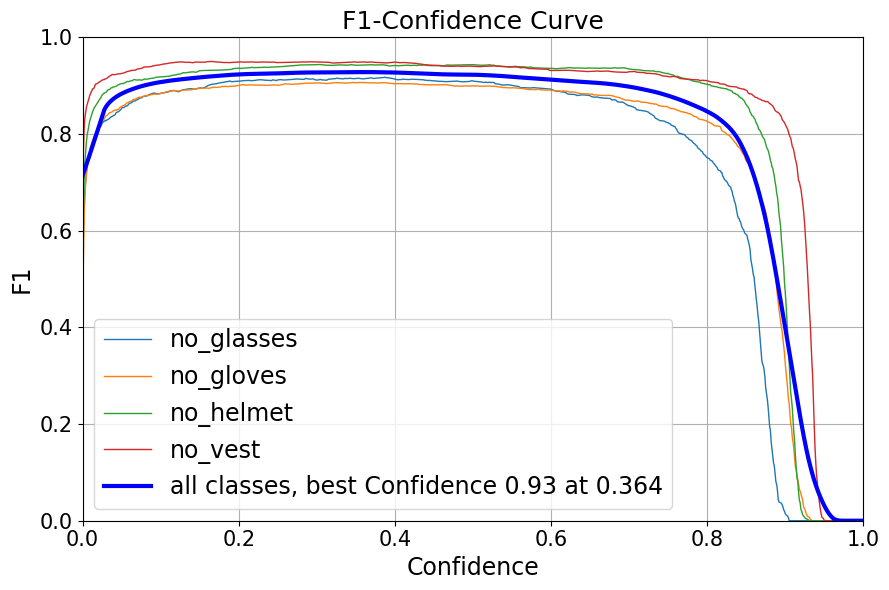

In [9]:
x, prec_values = np.linspace(0, 1, 1000), []

f1_curve = metrics.box.f1_curve
metrics.names
plot_mc_curve(x, f1_curve, metrics.names, ylabel="F1")

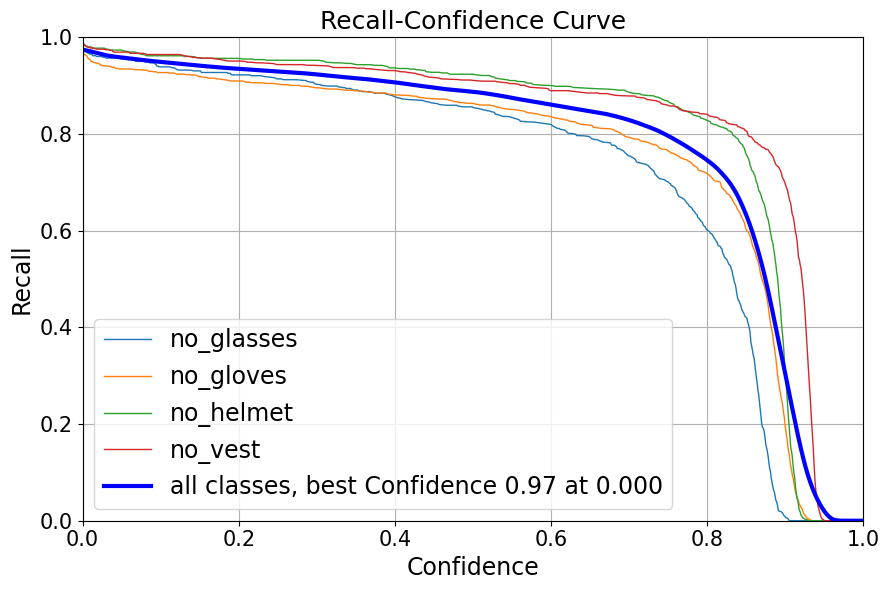

In [10]:
plot_mc_curve(x, metrics.box.r_curve, metrics.names, ylabel="Recall")

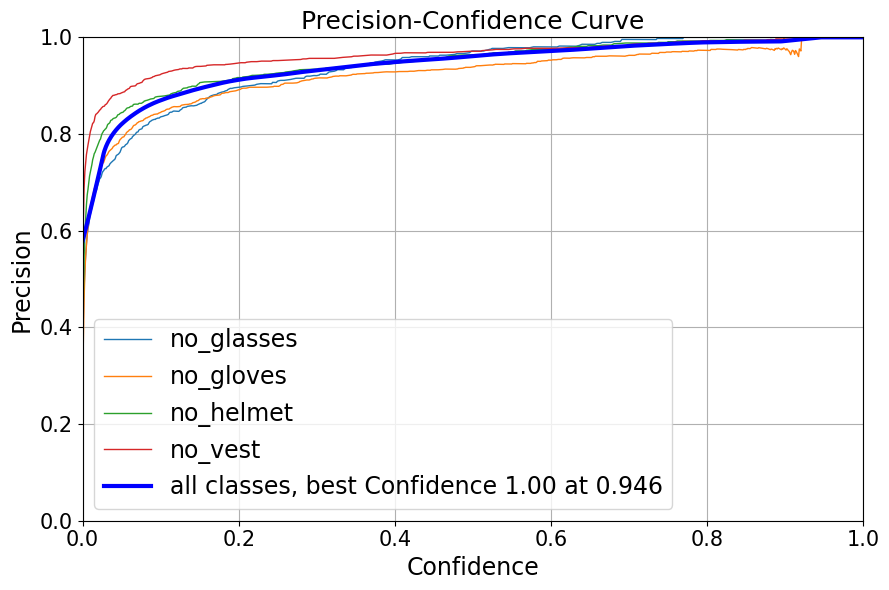

In [11]:
plot_mc_curve(x, metrics.box.p_curve, metrics.names, ylabel="Precision")

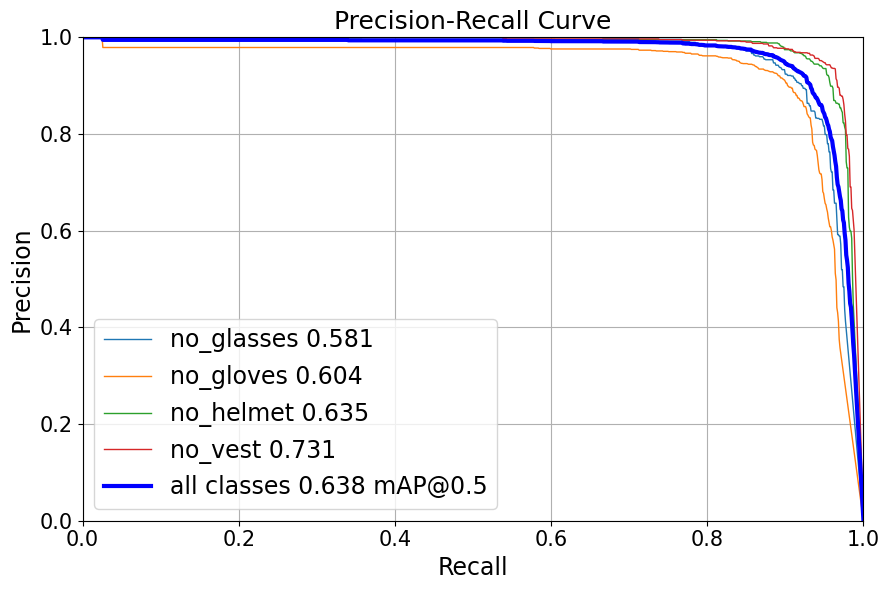

In [12]:
plot_pr_curve(x, metrics.box.prec_values, metrics.box.ap, metrics.names)

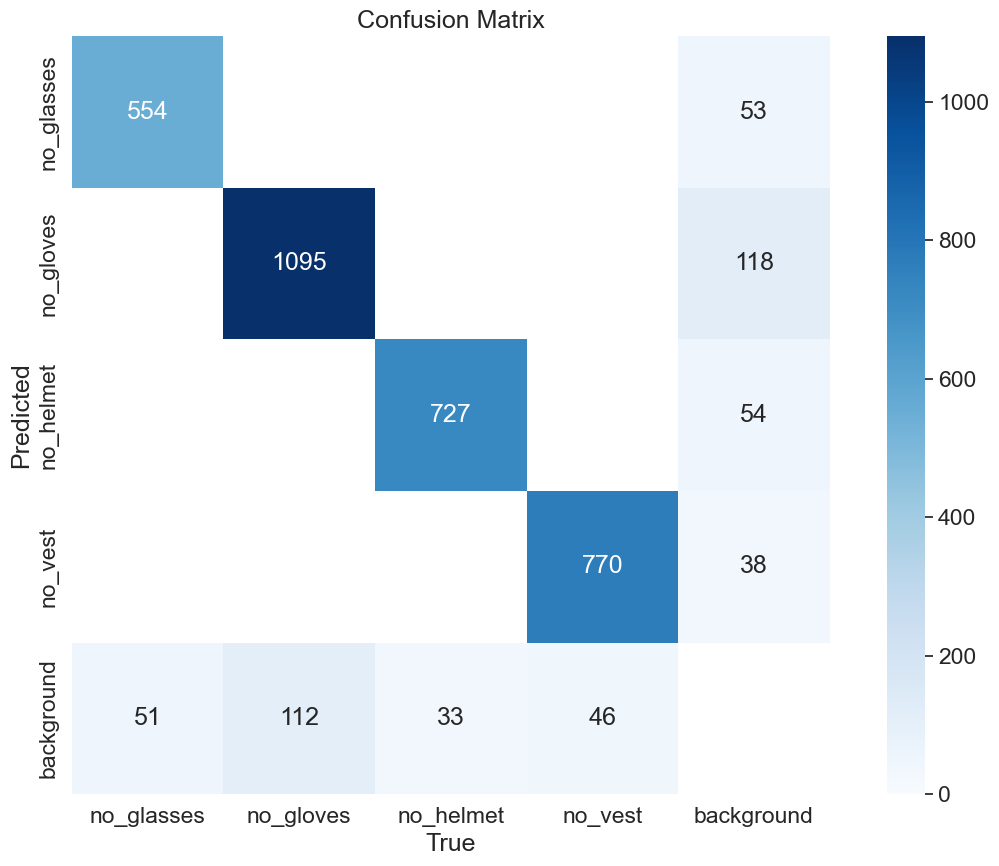

In [8]:
plot_confusion_matrix(metrics.confusion_matrix.matrix, normalize=False, names=metrics.names)

Predykcja

In [6]:
# Load a model
model = YOLO('runs/detect/dataset-v2-finetune-1/weights/best.pt')

# Define path to directory containing images and videos for inference
source = '/PRACA_MAGISTERSKA/DATASETS/PREDYKCJA/images'

# Run inference on the source
results = model(source)  # generator of Results objects

predictions = 'predictions/'
if not os.path.exists(predictions):
  os.mkdir(predictions)

# Process results list
for id, result in enumerate(results, 1):
    boxes = result.boxes          # Boxes object for bounding box outputs
    masks = result.masks          # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs          # Probs object for classification outputs
    obb = result.obb              # Oriented boxes object for OBB outputs
    result.show()                 # Display to screen
    result.save(filename= predictions + 'result_' + str(id) + '.jpg')  # Save to disk


image 1/3 f:\PRACA_MAGISTERSKA\DATASETS\PREDYKCJA\images\spacer-seniora1-2048x1362.jpg: 448x640 2 no_glassess, 5 no_glovess, 2 no_helmets, 2 no_vests, 100.6ms
image 2/3 f:\PRACA_MAGISTERSKA\DATASETS\PREDYKCJA\images\stock-photo-human-resource-team-talking-to-a-candidate-during-a-job-interview-in-the-office-2316131879.jpg: 480x640 3 no_glassess, 7 no_glovess, 4 no_helmets, 6 no_vests, 89.6ms
image 3/3 f:\PRACA_MAGISTERSKA\DATASETS\PREDYKCJA\images\stock-photo-human-resources-commission-interviewing-male-applicant-in-office-2409886423.jpg: 480x640 4 no_glassess, 3 no_glovess, 4 no_helmets, 5 no_vests, 42.3ms
Speed: 3.1ms preprocess, 77.5ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


In [10]:
model = YOLO('runs/detect/dataset-v2-finetune-1/weights/epoch110.pt')
results = model.predict(source='/PRACA_MAGISTERSKA/DATASETS/PREDYKCJA/images', show_conf=False, show_labels=False, device=0, save=True, conf=0.364)


image 1/6 f:\PRACA_MAGISTERSKA\DATASETS\PREDYKCJA\images\spacer-seniora1-2048x1362.jpg: 448x640 2 no_glassess, 4 no_glovess, 2 no_helmets, 2 no_vests, 80.4ms
image 2/6 f:\PRACA_MAGISTERSKA\DATASETS\PREDYKCJA\images\stock-photo-engineers-railway-survey-wearing-safety-uniform-under-conversation-document-and-tablet-on-hand-2468533629.jpg: 480x640 (no detections), 91.3ms
image 3/6 f:\PRACA_MAGISTERSKA\DATASETS\PREDYKCJA\images\stock-photo-human-resource-team-talking-to-a-candidate-during-a-job-interview-in-the-office-2316131879.jpg: 480x640 3 no_glassess, 6 no_glovess, 4 no_helmets, 5 no_vests, 21.8ms
image 4/6 f:\PRACA_MAGISTERSKA\DATASETS\PREDYKCJA\images\stock-photo-human-resources-commission-interviewing-male-applicant-in-office-2409886423.jpg: 480x640 3 no_glassess, 3 no_glovess, 4 no_helmets, 5 no_vests, 26.0ms
image 5/6 f:\PRACA_MAGISTERSKA\DATASETS\PREDYKCJA\images\stock-photo-latin-woman-with-curly-hair-wearing-a-hard-hat-and-reflective-vest-stands-confidently-in-a-city-257610339

In [4]:
import time
import numpy as np

In [16]:
model = YOLO('runs/detect/dataset-v2-finetune-1/weights/epoch110.pt')
start_time = time.time()
results = model.predict(source="/PRACA_MAGISTERSKA/DATASETS/PREDYKCJA/videos", show=False, device=0, save=True, show_conf=False, show_labels=False, conf=0.364, batch=64)
end_time = time.time()



WARNING  inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/4 (frame 1/227) f:\PRACA_MAGISTERSKA\DATASETS\PREDYKCJA\videos\las.webm: 352x640 3 no_glovess, 5 no_helmets, 4 no_vests, 9.1ms
video 1/4 (frame 2/227) f:\PRACA_MAGISTERSKA\DATASETS\PREDYKCJA\videos\las.webm: 352x640 3 no_glovess, 5 no_helmets, 4 no_vests, 9.1ms
video 1/4 (frame 3/227) f:\PRACA_MAGISTERSKA\DATASETS\PREDYKCJA\videos\las.webm: 352x640 1 no_glasses, 2 no_glovess, 5 no_helmets, 5 no_vests, 9.1ms
video 1/4 (frame 4/227) f:\PRACA_MAGIST

In [6]:
torch.cuda.empty_cache()

In [19]:
frame_count=1432
total_time = end_time - start_time
avg_fps = frame_count / total_time if total_time > 0 else 0

In [20]:
avg_fps

53.30501041473452

# najlepszy model

In [7]:
torch.cuda.empty_cache()
# Load a model
model = YOLO('runs/detect/dataset-v2-finetune-1/weights/epoch110.pt')

# Validate a model
metrics = model.val(iou=0.7, conf=0.364, device=0)   # no arguments needed, dataset and settings remembered
metrics.box.map         # map50-95
metrics.box.map50       # map50
metrics.box.map75       # map75
metrics.box.maps        # a list contains map50-95 of each category

Ultralytics 8.3.82  Python-3.11.11 torch-2.5.1 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLOv10m summary (fused): 159 layers, 16,455,016 parameters, 0 gradients, 63.4 GFLOPs


val: Scanning F:\PRACA_MAGISTERSKA\DATASETS\MAGISTERKA-V2\labels\val.cache... 679 images, 154 backgrounds, 0 corrupt: 1
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:10


                   all        679       3388      0.944      0.913      0.946      0.653
            no_glasses        407        605      0.945      0.888      0.937      0.596
             no_gloves        472       1207      0.926      0.887      0.917      0.625
             no_helmet        449        760      0.942      0.943      0.965      0.655
               no_vest        481        816      0.963      0.935      0.963      0.735
Speed: 0.2ms preprocess, 10.6ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs\detect\val7


array([    0.59564,     0.62531,     0.65452,     0.73478])

In [8]:
np.mean(metrics.box.f1)

np.float64(0.9283745394138229)

In [9]:
metrics.box.f1

array([     0.9156,     0.90609,      0.9428,       0.949])